In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [19]:
data = pd.read_csv('xinguan.csv')

In [123]:
pd.set_option('display.max_columns', None)
data.head()

,_id,mblogid,created_at,geo,ip_location,reposts_count,comments_count,attitudes_count,source,content,pic_urls,pic_num,isLongText,user,url,video,created_date,created_time,week,year,nick_name,verified,mbrank
0,4847453260483955,MjUtw21TJ,2022-12-16 23:59:40,NaN,发布于 山东,0,0,0,HarmonyOS设备,新冠最恐怖的是二次甚至三次感染，各种后遗症使得本来就在减少的劳动力雪上加霜。\n\n文明的发...,[],0,True,"{'_id': '5491192005', 'avatar_hd': 'https://tv...",https://weibo.com/5491192005/MjUtw21TJ,NaN,2022-12-16,23:59:40,50,2022,唯我识,False,2
1,4847437438518700,MjU3ZzK6o,2022-12-16 22:56:49,NaN,发布于 北京,0,11,14,iPhone,尼玛 刚退烧就来月经啊[可爱]也没说新冠后遗症有月经提前这一条啊[可爱],[],0,False,"{'_id': '5344649880', 'avatar_hd': 'https://tv...",https://weibo.com/5344649880/MjU3ZzK6o,NaN,2022-12-16,22:56:49,50,2022,热辣女神陶华碧哦,False,5
2,4847437556745422,MjU4bsiN8,2022-12-16 22:57:16,NaN,发布于 天津,0,0,0,iPhone客户端,#新冠对精神健康影响或超十年#我想知道有什么后遗症吗,[],0,False,"{'_id': '6512706840', 'avatar_hd': 'https://tv...",https://weibo.com/6512706840/MjU4bsiN8,NaN,2022-12-16,22:57:16,50,2022,爱坤小妹,False,2
3,4847299085738215,MjQsQo4LR,2022-12-16 13:47:03,NaN,发布于 北京,140,261,9560,NaN,“没有味觉”这种新冠后遗症的说法是不严谨的。\n\n正确来讲，你拥有了一种全新的味觉，叫做“...,[],0,False,"{'_id': '1672418622', 'avatar_hd': 'https://tv...",https://weibo.com/1672418622/MjQsQo4LR,NaN,2022-12-16,13:47:03,50,2022,琦殿,True,7
4,4847435695009722,MjU1bl1fY,2022-12-16 22:49:53,NaN,发布于 北京,0,0,1,iPhone 11,看到这个截图真的忍不住不转发，因为这种对老人家的担忧过于感同身受。之前我与未打疫苗的高龄奶奶...,['https://wx1.sinaimg.cn/orj960/9b8b7b05ly1h96...,1,True,"{'_id': '2609609477', 'avatar_hd': 'https://tv...",https://weibo.com/2609609477/MjU1bl1fY,NaN,2022-12-16,22:49:53,50,2022,一颗软糖唲,False,7


In [21]:
# change the data type of the date column
data['created_at'] = pd.to_datetime(data['created_at'])
# clear ouliers where entries are less than 2020
data = data[data['created_at'].dt.year >= 2020]

In [22]:
# Extract the week number
data['week'] = data['created_at'].dt.isocalendar().week
data['year'] = data['created_at'].dt.isocalendar().year

In [121]:
data.content[1]

'尼玛 刚退烧就来月经啊[可爱]也没说新冠后遗症有月经提前这一条啊[可爱] '

In [87]:
# check the number of unique values in the column 'ip_location'
pd.set_option('display.max_rows', 500)
data['ip_location'].value_counts()

ip_location
发布于 广东         5953
发布于 北京         4915
发布于 上海         3100
发布于 浙江         2704
发布于 江苏         2644
发布于 河南         2506
发布于 四川         2366
发布于 山东         2318
发布于 河北         1817
发布于 辽宁         1348
发布于 湖北         1347
发布于 陕西         1301
发布于 安徽         1094
发布于 福建         1078
发布于 重庆         1055
发布于 美国          995
发布于 湖南          994
发布于 天津          867
发布于 山西          727
发布于 江西          684
发布于 黑龙江         670
发布于 广西          624
发布于 甘肃          595
发布于 新疆          592
发布于 吉林          588
发布于 贵州          540
发布于 内蒙古         527
发布于 英国          499
发布于 云南          465
发布于 海南          458
发布于 日本          437
发布于 中国香港        434
发布于 加拿大         258
发布于 澳大利亚        200
发布于 德国          180
发布于 新加坡         169
发布于 中国台湾        154
发布于 青海          151
发布于 法国          144
发布于 宁夏          131
发布于 韩国          130
发布于 西藏          109
发布于 泰国           66
发布于 马来西亚         60
发布于 中国澳门         54
发布于 意大利          44
发布于 荷兰           41
发布于 西班牙          36
发布于 新西兰          34
发布于 俄罗斯 

In [107]:
# select where ip_location is '发布于 上海'
guangdong = data[data['ip_location'] == '发布于 广东']
beijing = data[data['ip_location'] == '发布于 北京']

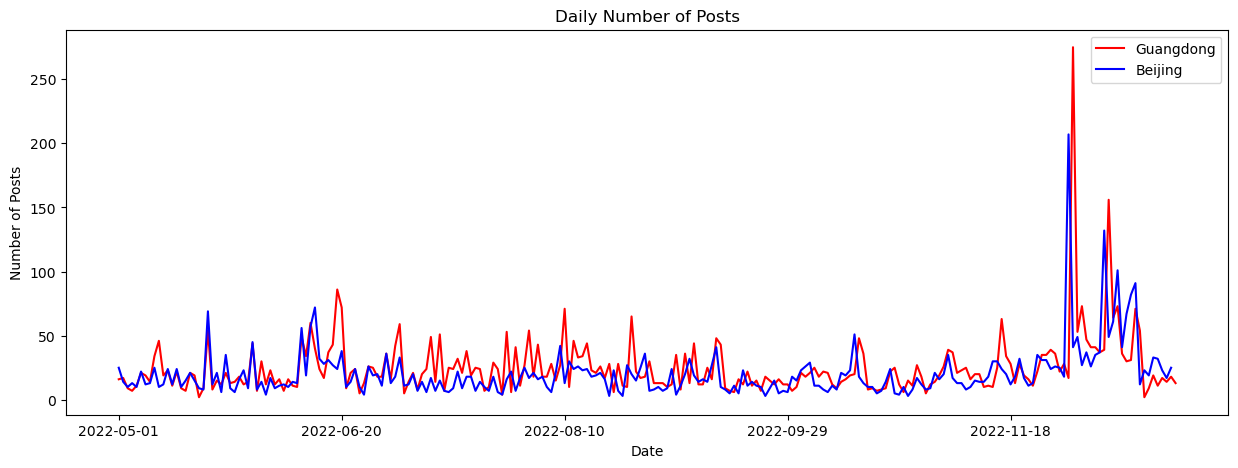

In [108]:
shanghai_daily = guangdong.groupby(['created_date']).size()
beijing_daily = beijing.groupby(['created_date']).size()

# plot the daily number of posts
plt.figure(figsize=(15, 5))
shanghai_daily.plot(kind='line', color='red')
beijing_daily.plot(kind='line', color='blue')
plt.title('Daily Number of Posts')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(['Guangdong', 'Beijing'])

plt.show()



In [24]:
# extract nick_name, verified, mbrank value from user column
data['nick_name'] = data['user'].apply(lambda x: ast.literal_eval(x)['nick_name'])
data['verified'] = data['user'].apply(lambda x: ast.literal_eval(x)['verified'])
data['mbrank'] = data['user'].apply(lambda x: ast.literal_eval(x)['mbrank'])

In [143]:

authority_keywords = [
    '早报', '晚报', '新闻', '报社', '时报', '日报', '报刊', '新华社', '人民日报', '中央电视台', '央视',
    '官方', '政府', '通讯社', '研究所', '医学会', '广播电台', '电视台', '发布', '健康局', '卫生局',
    '药学会', '团学会', '融媒体', '服务中心', '媒体中心', '健康中心', '观察者网', '新京报', '紫光阁'
]

remove_keywords = ['集团官方微博', '官微', '发布叻斯屎布利多', '诗酒流觞_港区日报写作中', '蒸汽机研究所', '韩国', '日本', '加拿大', '美国', '泰国', '欧洲', '俄罗斯'
                    '四川电视台峨眉电影频道社区生活', '加勒比之光雪茄新闻', '足球报', '大英发布', 'ETtoday星光雲官方微博', '韩民族', 'Xsens官方', '长兴坛灸堂', '麻省医疗国际官方账号',
                    '种草星球日报社', '电子商务官方微博', '驾校官方微博', '就业服务中心', '移民服务中心', '果然有喜', 'AKB48', 'Jesfull洁仕夫', '春日甜桃', '杨翔豆皮涮', '保险经纪',
                    '纽约', '西雅图', '北京科译翻译', '爱宠官方', '费城', '正骨', '·', '_', '-', '冬呱', '立邦物流', '广州仁爱', '留学', '新西兰', '英国', '大红袍', '希腊', '龙之少年',
                    '菲律宾', '摸鱼', '日语', '澳大利亚', '卡迪夫大学', '韩娱', '二次元', '华尔街', 'ChinaJoy', '偶像时报', '独傲', '格鲁吉亚', '曼彻斯特', 'game', '后援会', '粉丝',
                    '影迷', 'GNZ48', '爱豆', '韩娱', '澳大利亚', '是真的吗', '花王']



# show first 5 rows of the data where verified is True and nick_name contains authority_keywords but not remove_keywords
data[data['verified'] == True][data['nick_name'].str.contains('|'.join(authority_keywords))][~data['nick_name'].str.contains('|'.join(remove_keywords))].head()

# see the ratio of authority accounts in the verified accounts
authority_verified = data[data['verified'] == True][data['nick_name'].str.contains('|'.join(authority_keywords))][~data['nick_name'].str.contains('|'.join(remove_keywords))]

authority_verified.shape[0] / data.shape[0]


/var/folders/2k/13gwwbc55cgb7gvcfsjpdpyr0000gn/T/ipykernel_96776/3753142498.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['verified'] == True][data['nick_name'].str.contains('|'.join(authority_keywords))][~data['nick_name'].str.contains('|'.join(remove_keywords))].head()
/var/folders/2k/13gwwbc55cgb7gvcfsjpdpyr0000gn/T/ipykernel_96776/3753142498.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['verified'] == True][data['nick_name'].str.contains('|'.join(authority_keywords))][~data['nick_name'].str.contains('|'.join(remove_keywords))].head()
/var/folders/2k/13gwwbc55cgb7gvcfsjpdpyr0000gn/T/ipykernel_96776/3753142498.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  authority_verified = data[data['verified'] == True][data['nick_name'].str.contains('|'.join(authority_keywords))][~data['nick_name'].str.contains('|'.join(remove_keywords))]
/var/folders/2k/13gwwbc

0.10108178046926063

In [144]:

authority_verified.to_excel('authority_accounts2.xlsx', index=False)

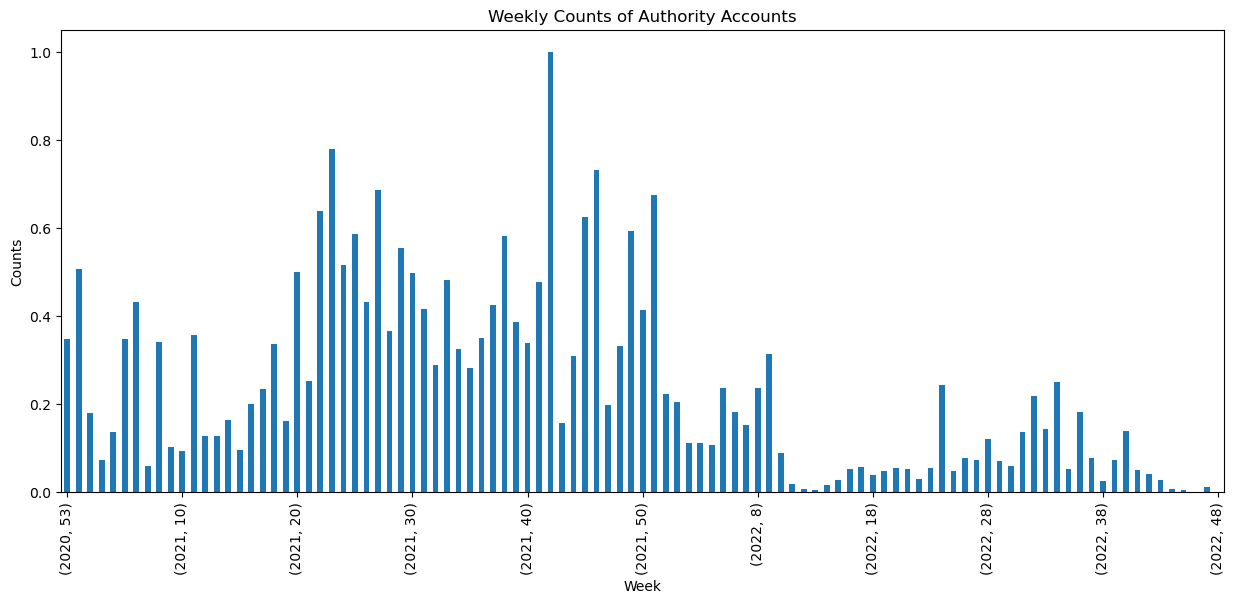

In [145]:

authority_accounts = authority_verified[authority_verified['created_at'] <= '2022-12-01']
authority_weekly_counts = authority_accounts.groupby(['year', 'week']).size()

# minmax scale the weekly counts
authority_weekly_counts = (authority_weekly_counts - authority_weekly_counts.min()) / (authority_weekly_counts.max() - authority_weekly_counts.min())


# # select last day of authority accounts
# authority_last_day = authority_accounts['created_date'].max()

# plot the weekly counts of authority accounts
plt.figure(figsize=(15, 6))
authority_weekly_counts.plot(kind='bar')
# set the interval of x-axis
plt.xticks(np.arange(0, len(authority_weekly_counts), 10), authority_weekly_counts.index[::10])

plt.title('Weekly Counts of Authority Accounts')
plt.xlabel('Week')
plt.ylabel('Counts')
plt.show()
# select last day of authority accounts
# authority_last_day

In [146]:
# check the last index of the weekly counts
authority_weekly_counts.index[-1]


(2022, 48)

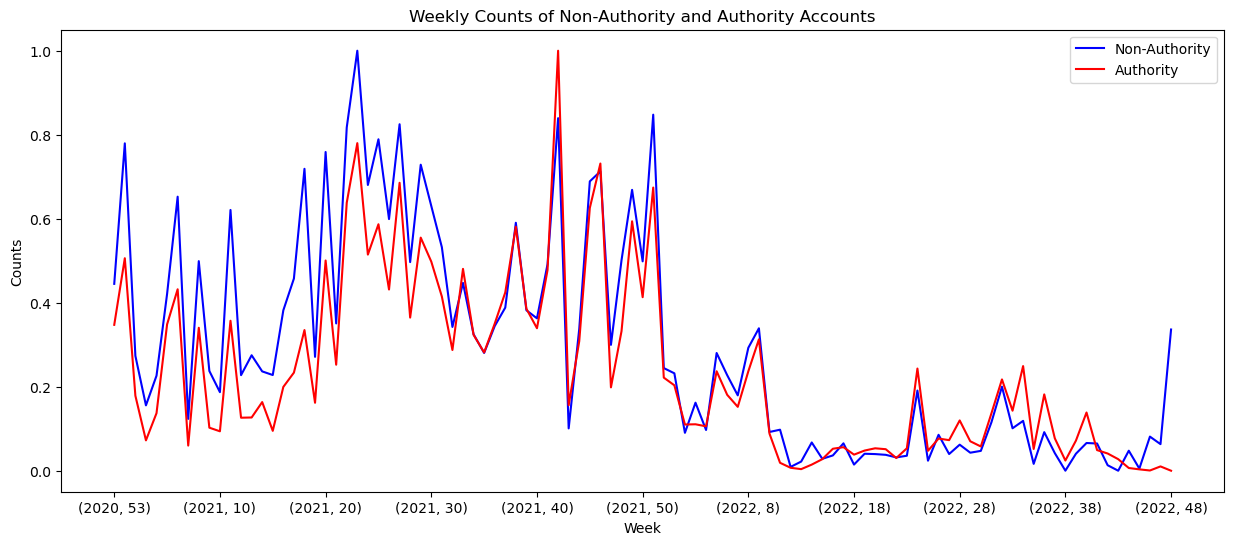

In [147]:
# select non-authority accounts
non_authority_accounts = data[~data['nick_name'].str.contains('|'.join(authority_keywords))]

# #drop the row where date is after the last day of authority accounts
# print(non_authority_accounts.shape)
# non_authority_accounts = non_authority_accounts[non_authority_accounts['created_date'] <= '2022-12-01']
# print(non_authority_accounts.shape)

non_authority_weekly_counts = non_authority_accounts.groupby(['year', 'week']).size()

# drop the data after the last day of authority accounts
non_authority_weekly_counts = non_authority_weekly_counts.loc[:authority_weekly_counts.index[-1]]

# minmax scale the weekly counts
non_authority_weekly_counts = (non_authority_weekly_counts - non_authority_weekly_counts.min()) / (non_authority_weekly_counts.max() - non_authority_weekly_counts.min())

# plot the weekly counts of non-authority accounts
plt.figure(figsize=(15, 6))
non_authority_weekly_counts.plot(kind='line', color='blue')
authority_weekly_counts.plot(kind='line', color='red')

# set the interval of x-axis
plt.xticks(np.arange(0, len(non_authority_weekly_counts), 10), non_authority_weekly_counts.index[::10])


plt.title('Weekly Counts of Non-Authority and Authority Accounts')
plt.xlabel('Week')
plt.ylabel('Counts')
plt.legend(['Non-Authority', 'Authority'])
plt.show()

In [148]:
# apply a OLS model to the weekly counts of non-authority accounts
import statsmodels.api as sm
from statsmodels.formula.api import ols

# use non_authority_weekly_counts as the dependent variable
y = non_authority_weekly_counts.values

# use authority_weekly_counts as the independent variable
X = authority_weekly_counts.values

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the OLS model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     674.0
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           5.62e-46
Time:                        23:00:50   Log-Likelihood:                 97.345
No. Observations:                 101   AIC:                            -190.7
Df Residuals:                      99   BIC:                            -185.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0228      0.014      1.632      0.1

In [149]:
# create a lag to authority_weekly_counts
authority_weekly_counts_lag = authority_weekly_counts.shift(1)

# calculate the correlation between non-authority and lag authority accounts
non_authority_weekly_counts.corr(authority_weekly_counts_lag)

0.569855868715384

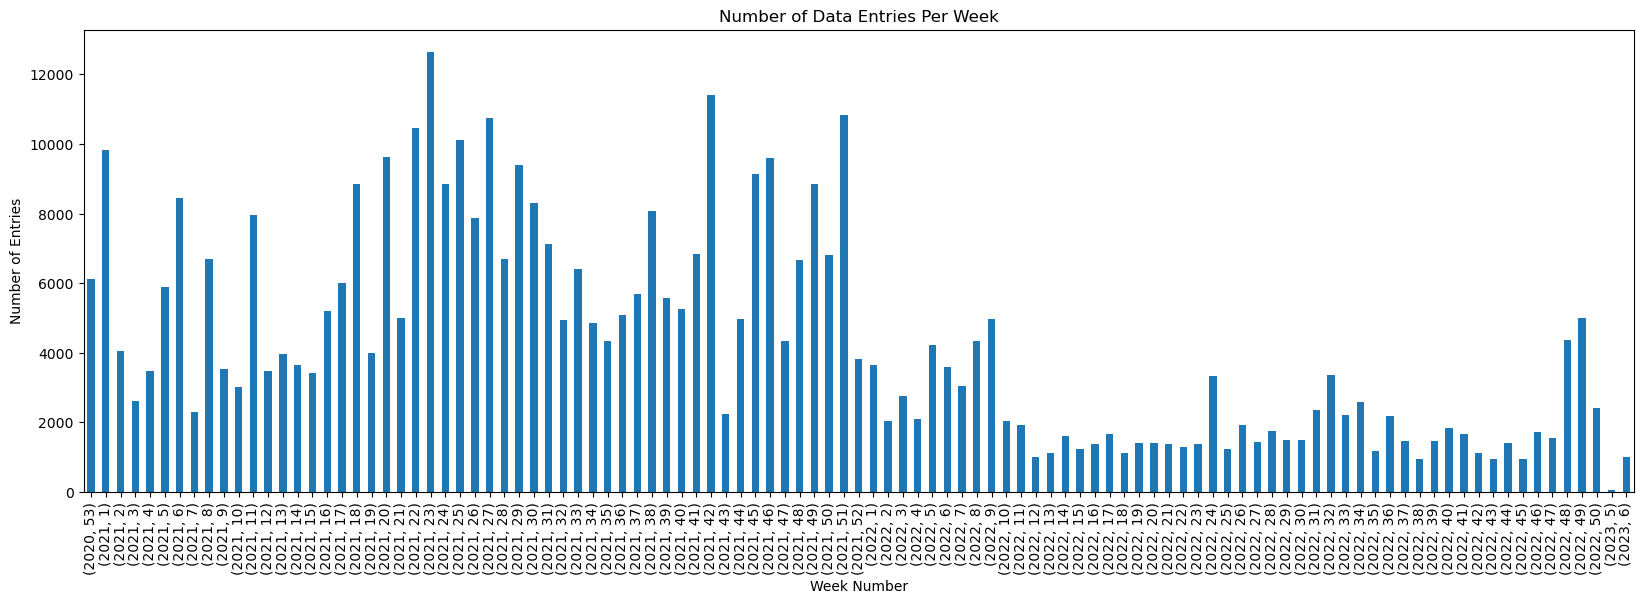

In [39]:
weekly_counts = data.groupby(['year', 'week']).size()

# Plot
plt.figure(figsize=(20, 6))
weekly_counts.plot(kind='bar')
plt.title('Number of Data Entries Per Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Entries')
plt.show()
